In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sbn 
sbn.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0 = pd.read_csv("Autoscout_Missing_Value.csv")
df = df0.copy()

In [3]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [4]:
def fill_prop(df, group_col, col_name):
    
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [5]:
df.isnull().sum()

Make_Model                 0
Make                       0
Location                   0
Price                      0
Body_Type                  0
Type                       0
Doors                      0
Mileage                    0
Gearbox                    0
Fuel_Type                  0
Colour                     0
Seller                     0
Seats                      0
Gears                      0
CO2_Emissions              0
Drivetrain                 0
Cylinders                  0
Comfort_Convenience        0
Entertainment_Media        0
Safety_Security            0
Extras                     0
Empty_Weight               0
Upholstery                 0
Previous_Owner             0
Energy_Efficiency_Class    0
Taxi_Rental_Car            0
Age                        0
Power_hp                   0
Engine_Size_cc             0
cons_comb                  0
dtype: int64

# Handling With Outliers

# Mileage

In [6]:
df.Mileage

0        120200.0
1          5000.0
2         18900.0
3         18995.0
4        197000.0
           ...   
28625     40345.0
28626    145000.0
28627     96000.0
28628     94343.0
28629    230047.0
Name: Mileage, Length: 28630, dtype: float64

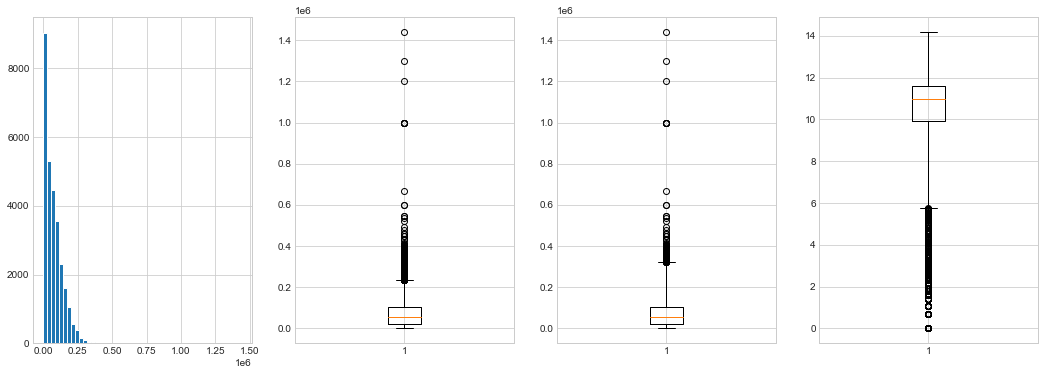

In [7]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.Mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.Mileage)

plt.subplot(143)
plt.boxplot(df.Mileage, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.Mileage), whis=2.5)

plt.show()  # Geniş değer aralığına sahiptir. Extreme değerler outliers kabul edilmez.

# Power_hp

In [8]:
df.Power_hp

0         90.0
1        292.0
2        421.0
3        306.0
4        136.0
         ...  
28625    392.0
28626    170.0
28627    114.0
28628    254.0
28629    200.0
Name: Power_hp, Length: 28630, dtype: float64

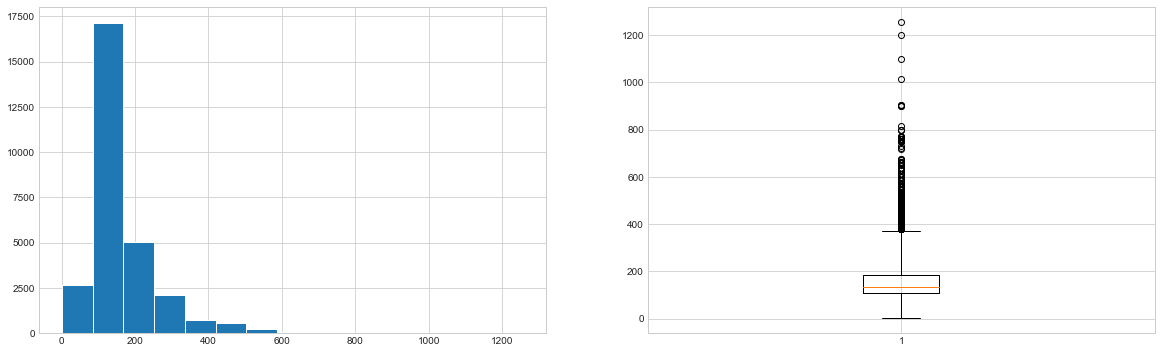

In [9]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Power_hp, bins=15)

plt.subplot(122)
plt.boxplot(df.Power_hp, whis=2.5)

plt.show()

In [10]:
df.Power_hp.describe()

count    28630.000000
mean       162.579672
std         92.947704
min          1.000000
25%        109.000000
50%        136.000000
75%        186.000000
max       1256.000000
Name: Power_hp, dtype: float64

In [11]:
df.Power_hp = df.Power_hp.astype("int")

In [12]:
np.sort(df.Power_hp.unique())

array([   1,    4,    5,    8,   10,   11,   12,   14,   16,   18,   19,
         20,   22,   23,   24,   26,   27,   29,   30,   31,   33,   34,
         35,   37,   39,   41,   42,   44,   45,   46,   48,   49,   50,
         52,   53,   54,   56,   57,   58,   60,   61,   63,   64,   65,
         67,   68,   69,   71,   72,   73,   75,   76,   77,   79,   80,
         82,   83,   84,   86,   87,   88,   90,   91,   92,   94,   95,
         97,   98,   99,  101,  102,  103,  105,  106,  107,  109,  110,
        111,  113,  114,  116,  117,  118,  120,  121,  122,  124,  125,
        126,  128,  129,  131,  132,  133,  135,  136,  137,  139,  140,
        141,  143,  144,  145,  147,  148,  150,  151,  152,  154,  155,
        156,  158,  159,  160,  162,  163,  165,  166,  167,  169,  170,
        171,  173,  174,  175,  177,  178,  179,  181,  182,  184,  185,
        186,  188,  189,  190,  192,  193,  194,  196,  197,  199,  200,
        201,  203,  204,  205,  207,  208,  209,  2

In [13]:
df.Power_hp.loc[df.Power_hp > 600] = np.nan

In [14]:
df.Power_hp.loc[df.Power_hp < 3 ] = np.nan

In [15]:
df.Power_hp.isnull().sum()

91

In [16]:
for group1 in df["Make_Model"].unique():
    for group2 in list(df["Body_Type"].unique()):
        cond2 = (df["Make_Model"] == group1) & (df["Body_Type"] == group2)
        df.loc[cond2, "Power_hp"] = df.loc[cond2, "Power_hp"].fillna(method= "ffill").fillna(method= "bfill")

for group1 in list(df["Make_Model"].unique()):
    cond1 = df["Make_Model"] == group1
    df.loc[cond1, "Power_hp"] = df.loc[cond1, "Power_hp"].fillna(method= "ffill").fillna(method= "bfill")
df.Power_hp = df.Power_hp.fillna(method= "ffill").fillna(method= "bfill")

In [17]:
df.Power_hp.isnull().sum()

0

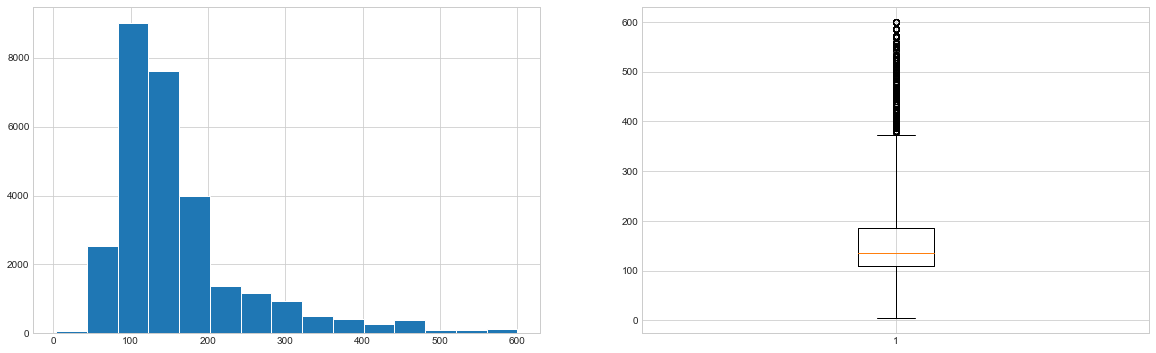

In [18]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Power_hp, bins=15)

plt.subplot(122)
plt.boxplot(df.Power_hp, whis=2.5)

plt.show()

# Safety_Security

In [19]:
df0.Safety_Security.value_counts() 

Medium_security    19178
Low_security        8657
High_security        795
Name: Safety_Security, dtype: int64

In [20]:
df.Colour.value_counts()

Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
Other     1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: Colour, dtype: int64

# Seats

In [21]:
df.Seats.value_counts(dropna = False)

5.0     20720
4.0      5967
2.0      1266
7.0       542
8.0        44
9.0        35
3.0        26
6.0        12
0.0         9
1.0         7
17.0        2
Name: Seats, dtype: int64

In [22]:
df.Seats.replace([0, 1, 3, 6, 8, 9, 17], np.nan, inplace=True)

In [23]:
df.Seats.isnull().sum()

135

In [24]:
fill(df, "Make_Model", "Body_Type", "Seats", "mode")

Number of NaN :  0
------------------
5.0    20803
4.0     5982
2.0     1288
7.0      557
Name: Seats, dtype: int64


In [25]:
df.Seats = df.Seats.astype("str")

# Engine_Size_cc

In [26]:
df.Engine_Size_cc

0        1400.0
1        1000.0
2        2000.0
3        2000.0
4        2000.0
          ...  
28625    2000.0
28626    2000.0
28627    1600.0
28628    2000.0
28629    3000.0
Name: Engine_Size_cc, Length: 28630, dtype: float64

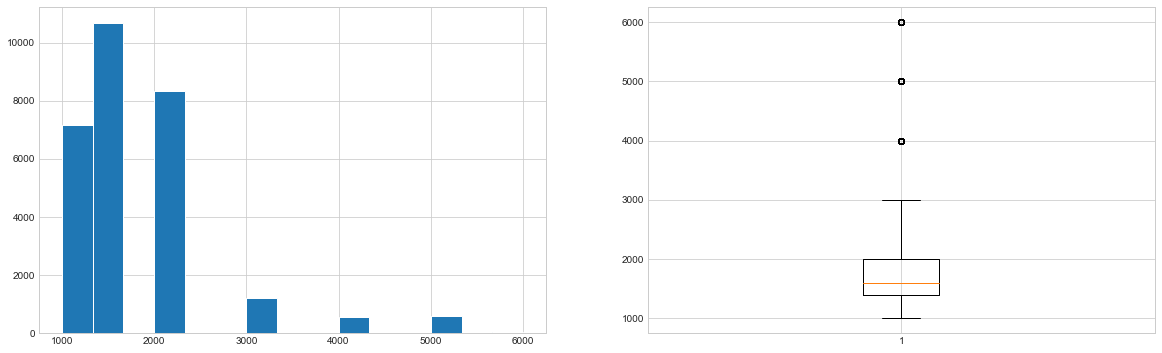

In [27]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.Engine_Size_cc, bins=15)

plt.subplot(122)
plt.boxplot(df.Engine_Size_cc, whis=2.5)

plt.show() # değerler gercek değerler

# Energy_Efficiency_Class

In [28]:
df["Energy_Efficiency_Class"].replace({"A+++": "High Efficiency",
                                       "A++": "High Efficiency",
                                       "A+": "High Efficiency",
                                       "A": "Medium Efficiency",
                                       "B": "Medium Efficiency",
                                       "C": "Medium Efficiency",
                                       "D": "Low Efficiency",
                                       "E": "Low Efficiency",
                                       "F": "Low Efficiency",
                                       "G": "Low Efficiency"
                                      }, inplace = True)

In [29]:
df.Energy_Efficiency_Class.value_counts()

Medium Efficiency    19053
Low Efficiency        4846
High Efficiency       4731
Name: Energy_Efficiency_Class, dtype: int64

# Gears

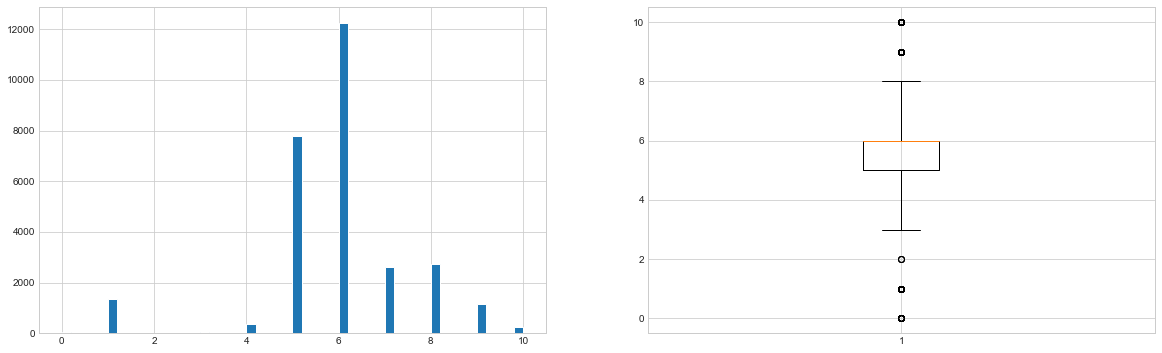

In [30]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=2.5)

plt.show()

<AxesSubplot:xlabel='Gears', ylabel='Price'>

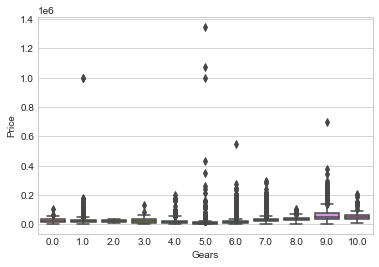

In [31]:
sns.boxplot(x='Gears', y='Price', data=df)

In [32]:
df.Gears.describe()

count    28630.000000
mean         5.888753
std          1.588194
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         10.000000
Name: Gears, dtype: float64

In [33]:
df.sort_values(by=["Gears"], ascending=False)["Gears"].head(10)

21557    10.0
21873    10.0
21871    10.0
21869    10.0
21865    10.0
21863    10.0
21860    10.0
21613    10.0
21616    10.0
21618    10.0
Name: Gears, dtype: float64

In [34]:
df.sort_values(by=["Gears"], ascending=True)["Gears"].head(10)

18150    0.0
28557    0.0
9770     0.0
18646    0.0
18583    0.0
23951    0.0
17930    0.0
18598    0.0
1396     0.0
18654    0.0
Name: Gears, dtype: float64

In [35]:
df[(df.Gears < 5) | (df.Gears > 8)][["Make_Model", "Body_Type", "Gearbox", "Gears"]].sample(20)

,Make_Model,Body_Type,Gearbox,Gears
601,Mercedes-Benz SLC 200,Convertible,Automatic,9.0
1106,Mercedes-Benz CLS 450,Coupe,Automatic,9.0
11827,Fiat 126,Sedan,Manual,4.0
18129,Toyota Corolla,Station wagon,Automatic,1.0
3409,Opel Monza,Coupe,Manual,4.0
1415,Mercedes-Benz GLC 43 AMG,Off-Road/Pick-up,Automatic,9.0
20552,Nissan Leaf,Sedan,Automatic,1.0
21735,Ford Mustang,Coupe,Automatic,10.0
2615,Opel Corsa,Compact,Automatic,1.0
16315,Dacia Spring,Sedan,Automatic,1.0


In [36]:
df[(df.Make_Model == "Mercedes-Benz EQS")][["Make_Model", "Body_Type", "Gearbox", "Gears"]]

,Make_Model,Body_Type,Gearbox,Gears
93,Mercedes-Benz EQS,Compact,Automatic,9.0
94,Mercedes-Benz EQS,Compact,Automatic,9.0
108,Mercedes-Benz EQS,Compact,Automatic,9.0
1628,Mercedes-Benz EQS,Station wagon,Automatic,1.0
1641,Mercedes-Benz EQS,Station wagon,Manual,1.0
1798,Mercedes-Benz EQS,Station wagon,Automatic,1.0
1998,Mercedes-Benz EQS,Sedan,Automatic,1.0
2000,Mercedes-Benz EQS,Sedan,Automatic,1.0
2004,Mercedes-Benz EQS,Sedan,Automatic,1.0
2015,Mercedes-Benz EQS,Sedan,Automatic,1.0


In [37]:
df["Gears"].replace([0,1, 2, 3, 4, 9, 10], np.nan, inplace=True)

In [38]:
df.Gears.isnull().sum()

3213

In [39]:
fill(df, "Make_Model", "Body_Type", "Gears", "mode")

Number of NaN :  0
------------------
6.0    14260
5.0     8368
7.0     3186
8.0     2816
Name: Gears, dtype: int64


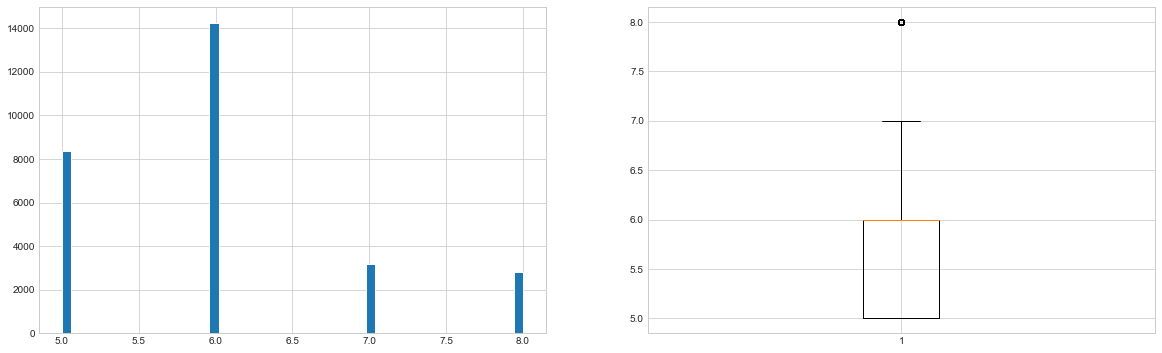

In [40]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=1.5)

plt.show()

# Empty weight

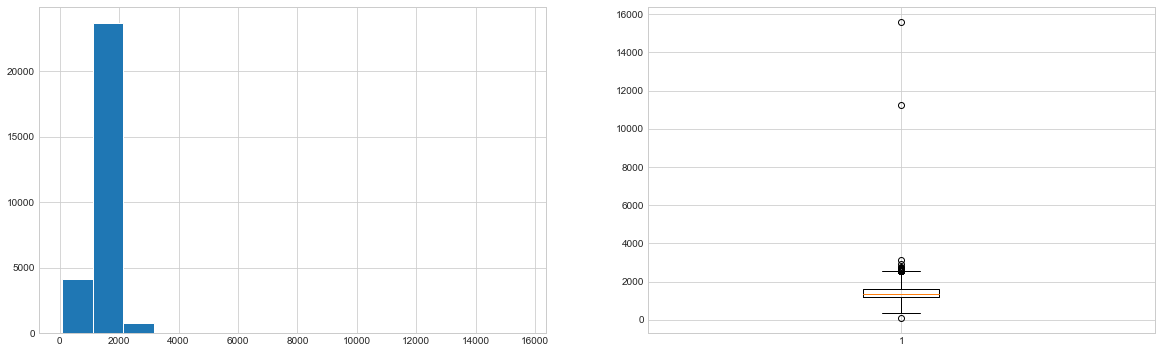

In [41]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Empty_Weight, bins=15)

plt.subplot(122)
plt.boxplot(df.Empty_Weight, whis=2.5)

plt.show()

In [42]:
df.Empty_Weight.describe()

count    28630.000000
mean      1419.375725
std        324.997457
min         75.000000
25%       1214.000000
50%       1371.000000
75%       1595.000000
max      15590.000000
Name: Empty_Weight, dtype: float64

In [43]:
df["Empty_Weight"].sort_values().head(10)

13995     75.0
6166     347.0
6205     375.0
4886     473.0
4943     473.0
4838     473.0
5430     473.0
5786     474.0
4188     525.0
5140     562.0
Name: Empty_Weight, dtype: float64

In [44]:
df.sort_values(by=["Empty_Weight"], ascending=False)["Empty_Weight"].head(10)

6869     15590.0
21142    11246.0
1295      3150.0
20037     2900.0
5414      2750.0
17891     2725.0
2371      2712.0
1199      2690.0
1628      2680.0
2199      2680.0
Name: Empty_Weight, dtype: float64

In [45]:
df["Empty_Weight"].replace([75, 15590.0,11246.0], np.nan, inplace = True)

In [46]:
df["Empty_Weight"].isnull().sum()

3

In [47]:
fill(df, "Make_Model", "Body_Type", "Empty_Weight", "mode")

Number of NaN :  0
------------------
1320.0    724
1280.0    518
1055.0    474
1395.0    461
1165.0    392
         ... 
2900.0      1
2029.0      1
2003.0      1
2159.0      1
1391.0      1
Name: Empty_Weight, Length: 1215, dtype: int64


In [48]:
df["Empty_Weight"].isnull().sum()

0

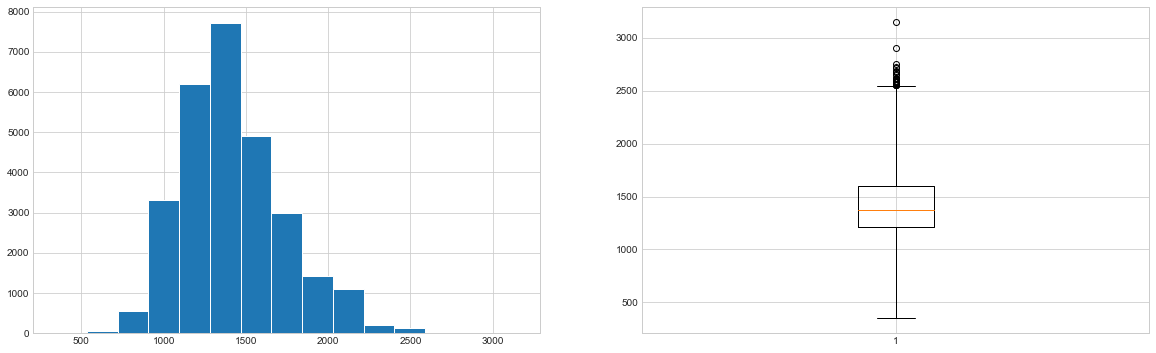

In [49]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Empty_Weight, bins=15)

plt.subplot(122)
plt.boxplot(df.Empty_Weight, whis=2.5)

plt.show()

# Age

In [50]:
df.Age.unique()

array([   6,    0,    2,    7,   17,    4,    3,    9,   12,    1,    8,
          5,   11,   16,   10,   14,   36,   37,   15,   18,   13,   24,
         29,   31,   56,   20,   39,   34,   35,   23,   43,   38,   19,
         22,   27,   45,   59,   25,   30,   41,   28,   21,   65,   26,
         49,   70,   60,   64,   44,   50,   32,   53,   52,   51,   58,
         46,   54,   40,   42,   55,   72,   47,   33,   61,   48, -180,
         92,   66,   76,   62,   57,   -3,   89,   68,   63,   -1,   93,
         67,   90,   85,   94,  122,   69], dtype=int64)

In [51]:
data = pd.read_csv('Age.csv')

In [52]:
data.Age.unique()

array([ 6,  0,  2,  7, 17,  4,  3,  9, 12,  1,  8,  5, 11, 16, 10, 14, 36,
       37, 15, 18, 13, 24, 29, 31, 56, 20, 39, 34, 35, 23, 43, 38, 19, 22,
       27, 45, 59, 25, 30, 41, 28, 21, 65, 26, 49, 70, 60, 64, 44, 50, 32,
       53, 52, 51, 58, 46, 54, 40, 42, 55, 72, 47, 33, 61, 48, 92, 66, 76,
       62, 57, 89, 68, 63, 93, 67, 90, 85, 94, 69], dtype=int64)

In [53]:
df.Age = data.Age

In [54]:
df.Age.unique()

array([ 6,  0,  2,  7, 17,  4,  3,  9, 12,  1,  8,  5, 11, 16, 10, 14, 36,
       37, 15, 18, 13, 24, 29, 31, 56, 20, 39, 34, 35, 23, 43, 38, 19, 22,
       27, 45, 59, 25, 30, 41, 28, 21, 65, 26, 49, 70, 60, 64, 44, 50, 32,
       53, 52, 51, 58, 46, 54, 40, 42, 55, 72, 47, 33, 61, 48, 92, 66, 76,
       62, 57, 89, 68, 63, 93, 67, 90, 85, 94, 69], dtype=int64)

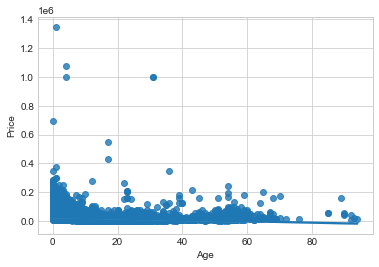

In [55]:
sns.regplot(x='Age', y='Price', data=df);

# Cylinders

In [56]:
df.Cylinders.value_counts()

4.0     19798
3.0      5148
6.0      1322
5.0       970
8.0       943
0.0       187
1.0       136
2.0       107
12.0       11
7.0         6
26.0        1
16.0        1
Name: Cylinders, dtype: int64

In [57]:
df.Cylinders.replace([26, 7], np.nan, inplace=True)

In [58]:
fill(df, "Make_Model", "Body_Type", "Cylinders", "mode")

Number of NaN :  0
------------------
4.0     19803
3.0      5148
6.0      1322
5.0       970
8.0       945
0.0       187
1.0       136
2.0       107
12.0       11
16.0        1
Name: Cylinders, dtype: int64


In [59]:
df.Cylinders.replace({1: 0}, inplace=True)

In [60]:
df.Cylinders.value_counts()

4.0     19803
3.0      5148
6.0      1322
5.0       970
8.0       945
0.0       323
2.0       107
12.0       11
16.0        1
Name: Cylinders, dtype: int64

In [61]:
df.Cylinders.isnull().sum()

0

# CO2_Emissions

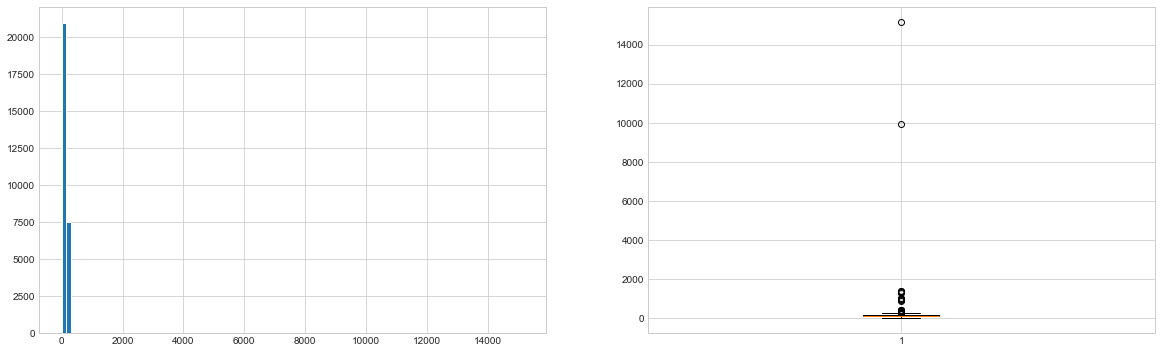

In [62]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emissions, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_Emissions, whis=2.5)

plt.show()

In [63]:
df.CO2_Emissions.describe()

count    28630.000000
mean       133.218137
std        121.686249
min          0.000000
25%        107.000000
50%        124.000000
75%        155.000000
max      15168.000000
Name: CO2_Emissions, dtype: float64

In [64]:
df.CO2_Emissions.value_counts().sort_index()

0.0        1410
0.5           3
1.0          11
3.0          24
5.0           1
           ... 
1360.0        1
1390.0        1
1410.0        1
9954.0        1
15168.0       1
Name: CO2_Emissions, Length: 397, dtype: int64

In [65]:
df.groupby(["Make_Model", "Body_Type", "CO2_Emissions"]).Price.describe()

count          mean  \
Make_Model   Body_Type        CO2_Emissions                        
Dacia        Compact          130.0            3.0  21431.000000   
             Sedan            130.0            1.0   9999.000000   
             Station wagon    130.0            1.0  21799.000000   
Dacia Break  Station wagon    124.0            1.0  20500.000000   
Dacia Dokker Compact          108.0            1.0  11930.000000   
...                                            ...           ...   
Volvo XC90   Off-Road/Pick-up 224.0            2.0  11850.000000   
                              306.0            2.0  16990.000000   
             Sedan            47.0             3.0  60366.666667   
             Station wagon    149.0            2.0  29500.000000   
                              152.0            2.0  36000.000000   

                                                      std      min      25%  \
Make_Model   Body_Type        CO2_Emissions                                   
Dacia        Compact          130.0           1661.743663  19515.0  20907.0   
             Sedan            130.0                   NaN   9999.0   9999.0   
             Station wagon    130.0                   NaN  21799.0  21799.0   
Dacia Break  Station wagon    124.0                   NaN  20500.0  20500.0   
Dacia Dokker Compact          108.0                   NaN  11930.0  11930.0   
...                                                   ...      ...      ...   
Volvo XC90   Off-Road/Pick-up 224.0              0.000000  11850.0  11850.0   
                              306.0              0.000000  16990.0  16990.0   
             Sedan            47.0           21250.254900  47700.0  48100.0   
             Station wagon    149.0              0.000000  29500.0  29500.0   
                              152.0              0.000000  36000.0  36000.0   

                                                 50%      75%      max  
Make_Model   Body_Type        CO2_Emissions                             
Dacia        Compact          130.0          22299.0  22389.0  22479.0  
             Sedan            130.0           9999.0   9999.0   9999.0  
             Station wagon    130.0          21799.0  21799.0  21799.0  
Dacia Break  Station wagon    124.0          20500.0  20500.0  20500.0  
Dacia Dokker Compact          108.0          11930.0  11930.0  11930.0  
...                                              ...      ...      ...  
Volvo XC90   Off-Road/Pick-up 224.0          11850.0  11850.0  11850.0  
                              306.0          16990.0  16990.0  16990.0  
             Sedan            47.0           48500.0  66700.0  84900.0  
             Station wagon    149.0          29500.0  29500.0  29500.0  
                              152.0          36000.0  36000.0  36000.0  

[7041 rows x 8 columns]

In [66]:
np.sort(df["CO2_Emissions"].unique())

array([0.0000e+00, 5.0000e-01, 1.0000e+00, 3.0000e+00, 5.0000e+00,
       7.0000e+00, 8.0000e+00, 1.0000e+01, 1.3000e+01, 1.4000e+01,
       1.5000e+01, 1.6000e+01, 1.7000e+01, 1.8000e+01, 1.9000e+01,
       2.0000e+01, 2.1000e+01, 2.2000e+01, 2.3000e+01, 2.4000e+01,
       2.5000e+01, 2.6000e+01, 2.7000e+01, 2.8000e+01, 2.9000e+01,
       3.0000e+01, 3.1000e+01, 3.2000e+01, 3.3000e+01, 3.4000e+01,
       3.5000e+01, 3.6000e+01, 3.7000e+01, 3.7500e+01, 3.8000e+01,
       3.9000e+01, 4.0000e+01, 4.1000e+01, 4.2000e+01, 4.3000e+01,
       4.4000e+01, 4.5000e+01, 4.6000e+01, 4.7000e+01, 4.8000e+01,
       4.9000e+01, 5.0000e+01, 5.1000e+01, 5.2000e+01, 5.3000e+01,
       5.4000e+01, 5.5000e+01, 5.5500e+01, 5.6000e+01, 5.6500e+01,
       5.9000e+01, 6.3500e+01, 6.4000e+01, 6.5000e+01, 6.6000e+01,
       6.8000e+01, 7.0000e+01, 7.1000e+01, 7.3000e+01, 7.5000e+01,
       7.5500e+01, 7.6000e+01, 7.8000e+01, 7.9000e+01, 8.0000e+01,
       8.1000e+01, 8.2000e+01, 8.3000e+01, 8.4000e+01, 8.5000e

In [67]:
df[(df["CO2_Emissions"] < 79) | (df["CO2_Emissions"] > 300)]

,Make_Model,Make,Location,Price,Body_Type,Type,Doors,Mileage,Gearbox,Fuel_Type,Colour,Seller,Seats,Gears,CO2_Emissions,Drivetrain,Cylinders,Comfort_Convenience,Entertainment_Media,Safety_Security,Extras,Empty_Weight,Upholstery,Previous_Owner,Energy_Efficiency_Class,Taxi_Rental_Car,Age,Power_hp,Engine_Size_cc,cons_comb
1,Mercedes-Benz EQE 350,Mercedes-Benz Eqe 350,Spain,80900.0,Compact,Pre-registered,4.0,5000.0,Automatic,Electric,Other,Dealer,5.0,6.0,0.0,4WD,4.0,Standard,Standard,Medium_security,Premium,2355.0,Full_leather,-,High Efficiency,No,0,292.0,1000.0,4.9
12,Mercedes-Benz A 250,Mercedes-Benz A 250,Spain,23999.0,Compact,Used,5.0,25914.0,Automatic,Benzine,Black,Dealer,5.0,7.0,22.0,Front,4.0,Standard,Standard,Low_security,Standard,1445.0,Cloth,-,High Efficiency,No,9,211.0,2000.0,6.0
16,Mercedes-Benz A 250,Mercedes-Benz A 250,Belgium,38999.0,Compact,Used,4.0,21496.0,Automatic,Benzine,Grey,Dealer,5.0,7.0,22.0,Front,4.0,Premium,Standard,Low_security,Standard,1680.0,Cloth,-,High Efficiency,No,1,160.0,1400.0,0.0
32,Mercedes-Benz A 250,Mercedes-Benz A 250,Spain,36900.0,Compact,Used,5.0,11990.0,Automatic,Benzine,White,Dealer,5.0,8.0,22.0,Front,4.0,Standard,Standard,Low_security,Standard,1680.0,Cloth,-,High Efficiency,No,1,218.0,1400.0,6.7
58,Mercedes-Benz A 250,Mercedes-Benz A 250,Germany,44785.0,Compact,Used,5.0,9000.0,Automatic,Benzine,Red,Dealer,5.0,8.0,0.0,Front,4.0,Premium,Standard,Medium_security,Premium,1680.0,Cloth,-,High Efficiency,No,2,235.0,1400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28528,Volvo S90,Volvo S90,Spain,51900.0,Sedan,Used,4.0,5087.0,Automatic,Electric,Other,Dealer,5.0,8.0,0.0,4WD,4.0,Standard,Standard,Medium_security,Premium,1892.0,Full_leather,-,Medium Efficiency,No,1,390.0,2000.0,4.8
28549,Volvo S90,Volvo S90,Holland,58900.0,Sedan,Used,4.0,10244.0,Automatic,Diesel,Black,Dealer,5.0,8.0,0.0,4WD,4.0,Standard,Standard,Medium_security,Premium,1728.0,Full_leather,-,Medium Efficiency,No,1,237.0,2000.0,4.8
28568,Volvo S60,Volvo S60,Austria,57900.0,Sedan,Demonstration,4.0,12.0,Automatic,Benzine,Black,Dealer,5.0,8.0,53.0,4WD,4.0,Standard,Standard,Low_security,Premium,2012.0,Other,-,Medium Efficiency,No,0,317.0,2000.0,6.3
28594,Volvo S60,Volvo S60,France,56999.0,Sedan,Used,4.0,13000.0,Automatic,Benzine,Other,Dealer,5.0,8.0,41.0,Front,4.0,Premium,Standard,Low_security,Standard,1735.0,Part_leather,-,High Efficiency,No,0,257.0,2000.0,6.3


In [68]:
df.loc[(df["CO2_Emissions"] < 79) | (df["CO2_Emissions"] > 300) , "CO2_Emissions"] = np.nan

In [69]:
df["CO2_Emissions"].value_counts(dropna=False)

NaN       2323
124.00    1057
115.00     622
99.00      588
119.00     585
          ... 
108.50       1
111.50       1
127.50       1
146.75       1
95.50        1
Name: CO2_Emissions, Length: 278, dtype: int64

In [70]:
for group1 in list(df["Make_Model"].unique()):
    for group2 in list(df["Body_Type"].unique()):
        for group3 in list(df["Fuel_Type"].unique()):
            cond1 = df["Make_Model"] == group1
            cond2 = (df["Make_Model"] == group1) & (df["Body_Type"] == group2)
            cond3 = (df["Make_Model"] == group1) & (
                df["Body_Type"] == group2) & (df["Fuel_Type"] == group3)
            mode1 = list(df[cond1]["CO2_Emissions"].mode())
            mode2 = list(df[cond2]["CO2_Emissions"].mode())
            mode3 = list(df[cond3]["CO2_Emissions"].mode())
            if mode3 != []:
                df.loc[cond3,
                       "CO2_Emissions"] = df.loc[cond3, "CO2_Emissions"].fillna(
                           df[cond3]["CO2_Emissions"].mode()[0])
            elif mode2 != []:
                df.loc[cond3,
                       "CO2_Emissions"] = df.loc[cond3, "CO2_Emissions"].fillna(
                           df[cond2]["CO2_Emissions"].mode()[0])
            elif mode1 != []:
                df.loc[cond3,
                       "CO2_Emissions"] = df.loc[cond3, "CO2_Emissions"].fillna(
                           df[cond1]["CO2_Emissions"].mode()[0])
            else:
                df.loc[cond3,
                       "CO2_Emissions"] = df.loc[cond3, "CO2_Emissions"].fillna(
                           df["CO2_Emissions"].mode()[0])

In [71]:
df.CO2_Emissions.isnull().sum()

0

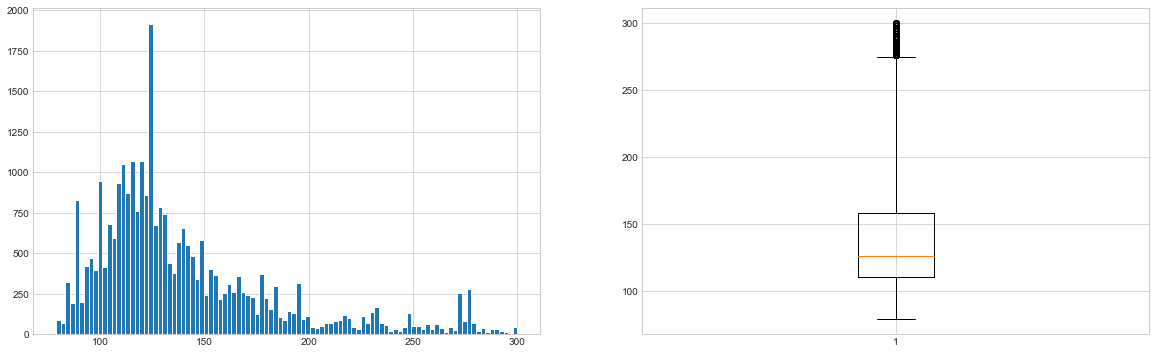

In [72]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emissions, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_Emissions, whis=2.5)

plt.show()

# cons_comb 

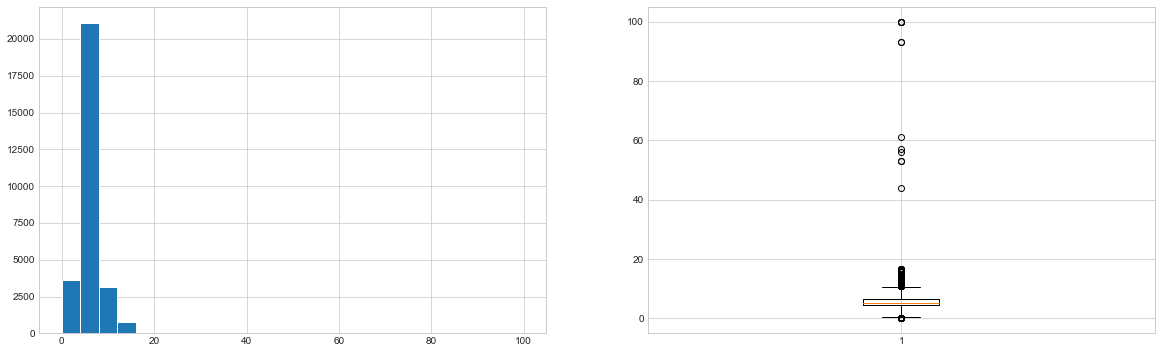

In [73]:
plt.figure(figsize = (20, 6))
plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)
plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2)
plt.show()

In [74]:
df.cons_comb.describe()

count    28630.000000
mean         5.790283
std          2.650420
min          0.000000
25%          4.500000
50%          5.200000
75%          6.600000
max         99.900000
Name: cons_comb, dtype: float64

In [111]:
df.loc[(df['cons_comb']> 10)|(df['cons_comb']<3), 'cons_comb'] = np.nan

In [112]:
mode_Cons= df.groupby(['CO2_Emissions'])['cons_comb']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['cons_comb'] = df['cons_comb'].fillna(mode_Cons)
mode_Cons1= df.groupby(['Engine_Size_cc'])['cons_comb']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['cons_comb'] = df['cons_comb'].fillna(mode_Cons1)
mode_Cons2= df.groupby(['Make_Model'])['cons_comb']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['cons_comb'] = df['cons_comb'].fillna(mode_Cons2)

In [113]:
df['cons_comb'].isnull().sum()

0

In [114]:
df.cons_comb.describe()

count    28626.000000
mean         5.672714
std          1.593515
min          3.000000
25%          4.500000
50%          5.200000
75%          6.500000
max         10.000000
Name: cons_comb, dtype: float64

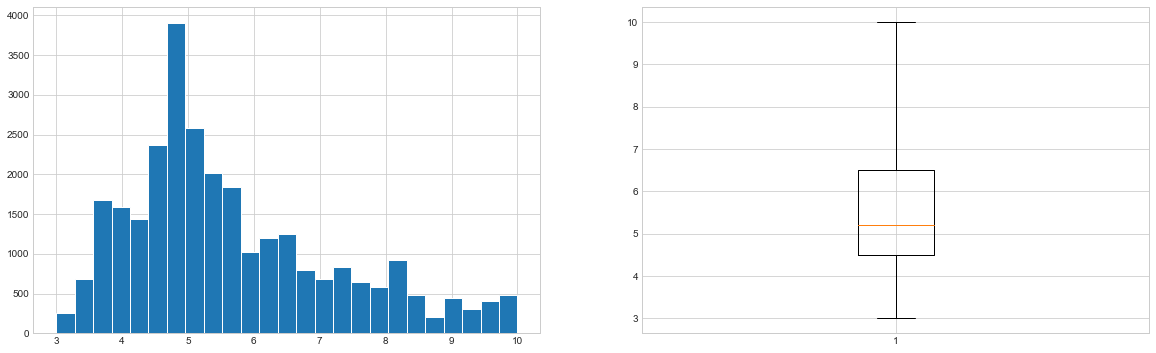

In [115]:
plt.figure(figsize = (20, 6))
plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)
plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2)
plt.show()

In [116]:
df.cons_comb.describe()

count    28626.000000
mean         5.672714
std          1.593515
min          3.000000
25%          4.500000
50%          5.200000
75%          6.500000
max         10.000000
Name: cons_comb, dtype: float64

# Doors

In [81]:
df.Doors.value_counts(dropna = False)

5.0    17637
2.0     5669
4.0     3013
3.0     2304
6.0        5
1.0        2
Name: Doors, dtype: int64

In [82]:
df.Doors.replace([1, 6], np.nan, inplace=True)

In [83]:
df.Doors.value_counts(dropna = False)

5.0    17637
2.0     5669
4.0     3013
3.0     2304
NaN        7
Name: Doors, dtype: int64

In [84]:
fill(df, "Make_Model", "Body_Type", "Doors", "mode")

Number of NaN :  0
------------------
5.0    17643
2.0     5670
4.0     3013
3.0     2304
Name: Doors, dtype: int64


In [85]:
df.Doors = df.Doors.astype("str")

In [86]:
df.corr()

,Price,Mileage,Gears,CO2_Emissions,Cylinders,Empty_Weight,Age,Power_hp,Engine_Size_cc,cons_comb
Price,1.000000,-0.304658,0.329187,0.266516,0.327603,0.460159,-0.155848,0.589000,0.397080,0.277712
Mileage,-0.304658,1.000000,-0.226915,0.168969,0.136943,-0.012917,0.475505,-0.091347,0.116481,0.131801
Gears,0.329187,-0.226915,1.000000,0.038218,0.094288,0.543255,-0.331464,0.405842,0.200904,-0.013919
CO2_Emissions,0.266516,0.168969,0.038218,1.000000,0.634967,0.444946,0.327580,0.654289,0.699947,0.893955
Cylinders,0.327603,0.136943,0.094288,0.634967,1.000000,0.411306,0.255051,0.637016,0.818143,0.629935
Empty_Weight,0.460159,-0.012917,0.543255,0.444946,0.411306,1.000000,-0.118685,0.665786,0.550393,0.351484
Age,-0.155848,0.475505,-0.331464,0.327580,0.255051,-0.118685,1.000000,-0.033883,0.226703,0.330043
Power_hp,0.589000,-0.091347,0.405842,0.654289,0.637016,0.665786,-0.033883,1.000000,0.769178,0.635811
Engine_Size_cc,0.397080,0.116481,0.200904,0.699947,0.818143,0.550393,0.226703,0.769178,1.000000,0.692241
cons_comb,0.277712,0.131801,-0.013919,0.893955,0.629935,0.351484,0.330043,0.635811,0.692241,1.000000


# Price

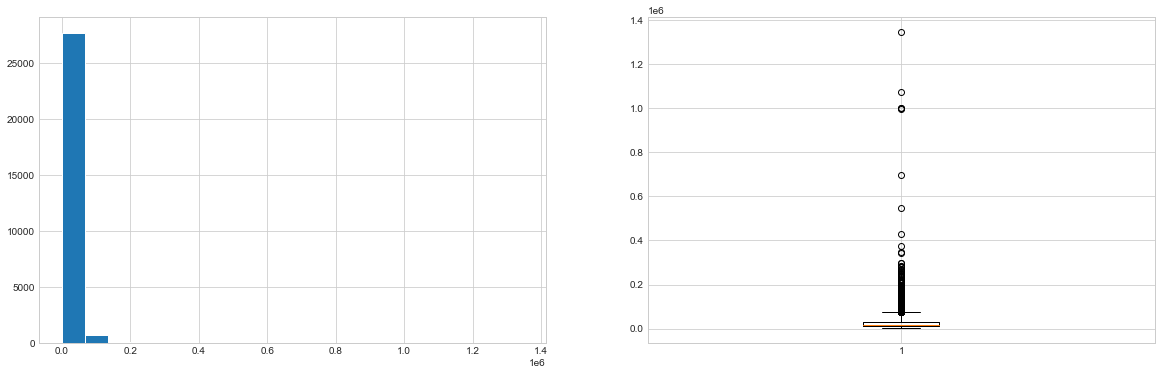

In [87]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Price, bins=20)

plt.subplot(122)
plt.boxplot(df.Price, whis=3)

plt.show()

In [88]:
df.Price.describe()

count    2.863000e+04
mean     2.355520e+04
std      2.595371e+04
min      4.900000e+02
25%      1.199000e+04
50%      1.798000e+04
75%      2.799000e+04
max      1.346900e+06
Name: Price, dtype: float64

In [89]:
df.Price.sort_values().head(5)

5847     490.0
5513     500.0
19565    500.0
17516    590.0
5291     600.0
Name: Price, dtype: float64

In [90]:
drop_index = df.Price.sort_values().index[:4]
drop_index

Int64Index([5847, 5513, 19565, 17516], dtype='int64')

In [91]:
df.drop(drop_index, axis=0, inplace=True)

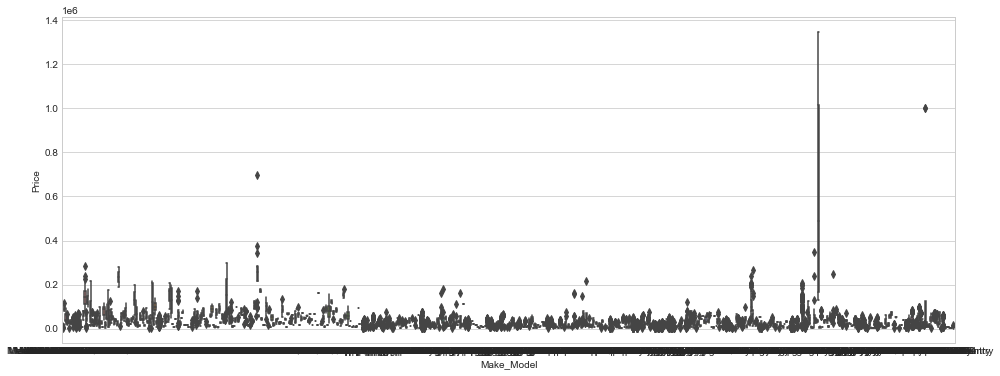

In [92]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="Make_Model", y="Price", data=df, whis=1)
plt.show()

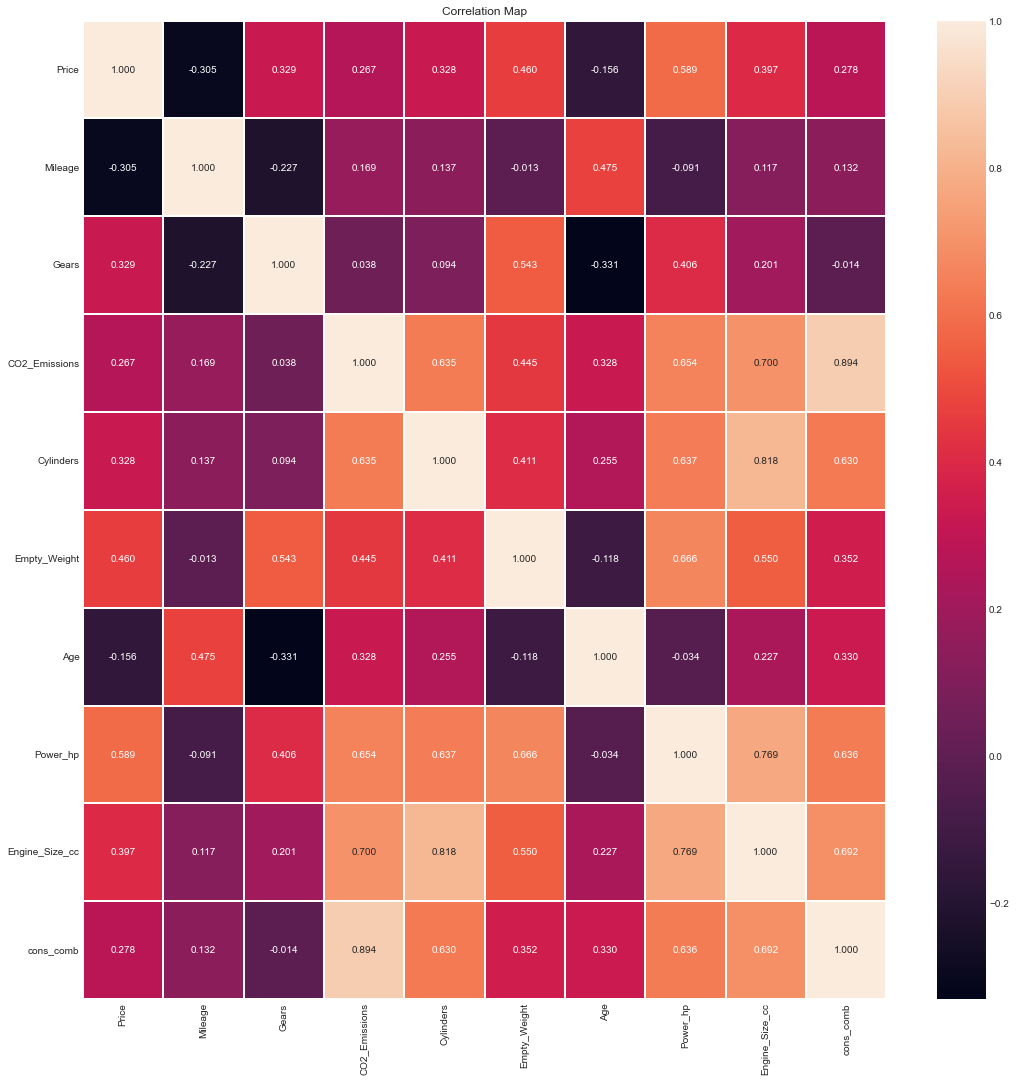

In [93]:
f,ax=plt.subplots(figsize = (18,18))
sbn.heatmap(df.corr(),annot= True,linewidths=0.2,fmt = ".3f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [117]:
def remove_outliers(df, cols):
    for col in cols:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 -q1
        lower_bound = q1 -(iqr * 1.5)
        upper_bound = q3 + (iqr * 1.5)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


df = remove_outliers(df, ['Price'])

In [118]:
df.corr()

,Price,Mileage,Gears,CO2_Emissions,Cylinders,Empty_Weight,Age,Power_hp,Engine_Size_cc,cons_comb
Price,1.000000,-0.511903,0.605973,0.096279,0.164021,0.529258,-0.342292,0.572329,0.308551,0.019394
Mileage,-0.511903,1.000000,-0.200546,0.255963,0.231814,0.081070,0.484525,0.019535,0.220632,0.231057
Gears,0.605973,-0.200546,1.000000,-0.010202,0.068977,0.551104,-0.321918,0.407528,0.191339,-0.063722
CO2_Emissions,0.096279,0.255963,-0.010202,1.000000,0.575471,0.399067,0.412313,0.611167,0.644310,0.800403
Cylinders,0.164021,0.231814,0.068977,0.575471,1.000000,0.396893,0.329108,0.588405,0.772593,0.395064
Empty_Weight,0.529258,0.081070,0.551104,0.399067,0.396893,1.000000,-0.064666,0.630732,0.551715,0.275151
Age,-0.342292,0.484525,-0.321918,0.412313,0.329108,-0.064666,1.000000,0.041020,0.304225,0.403972
Power_hp,0.572329,0.019535,0.407528,0.611167,0.588405,0.630732,0.041020,1.000000,0.754694,0.470480
Engine_Size_cc,0.308551,0.220632,0.191339,0.644310,0.772593,0.551715,0.304225,0.754694,1.000000,0.424067
cons_comb,0.019394,0.231057,-0.063722,0.800403,0.395064,0.275151,0.403972,0.470480,0.424067,1.000000


In [96]:
df5.shape

(26716, 30)

In [97]:
numeric_col = "Price,Mileage,Gears,Previous_Owners,cons_comb,Engine_Size_cc,Age,Power_hp,Empty_Weight".split(",")

In [98]:
#df_num = df["numeric_col"]

In [102]:
# df_num

In [100]:
df.Previous_Owner.value_counts()

-       14979
1.0      9488
2.0      3138
3.0       679
4.0       180
5.0        68
6.0        36
7.0        22
8.0        15
9.0        14
12.0        3
10.0        2
14.0        1
13.0        1
Name: Previous_Owner, dtype: int64

In [106]:
df.Previous_Owner.replace("-", np.nan, inplace=True)

In [107]:
df["Previous_Owner"].value_counts(dropna=False)

NaN     14979
1.0      9488
2.0      3138
3.0       679
4.0       180
5.0        68
6.0        36
7.0        22
8.0        15
9.0        14
12.0        3
10.0        2
14.0        1
13.0        1
Name: Previous_Owner, dtype: int64

In [109]:
fill_prop(df, "Age", "Previous_Owner")

Number of NaN :  0
------------------
1.0     19355
2.0      6878
3.0      1496
4.0       436
5.0       153
6.0       109
7.0        97
8.0        69
9.0        19
14.0        5
12.0        4
13.0        3
10.0        2
Name: Previous_Owner, dtype: int64


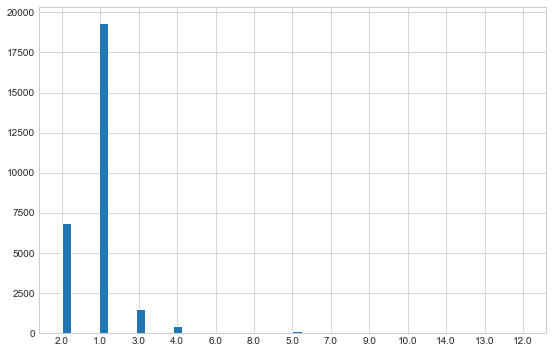

In [110]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Previous_Owner, bins=50)

plt.show()

In [121]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep=",").add_prefix("ss_"))
df = df.join(df["Doors"].str.get_dummies(sep=",").add_prefix("dr_"))
df = df.join(df["Seats"].str.get_dummies(sep=",").add_prefix("st_"))
df = df.join(df["Taxi_Rental_Car"].str.get_dummies(sep=",").add_prefix("trc_"))
df = df.join(df["Colour"].str.get_dummies(sep=",").add_prefix("cl_"))
df = df.join(df["Fuel_Type"].str.get_dummies(sep=",").add_prefix("ft_"))
df = df.join(df["Energy_Efficiency_Class"].str.get_dummies(sep=",").add_prefix("eec_"))
df = df.join(df["Location"].str.get_dummies(sep=",").add_prefix("lc_"))
df = df.join(df["Make_Model"].str.get_dummies(sep=",").add_prefix("mm_"))
df = df.join(df["Body_Type"].str.get_dummies(sep=",").add_prefix("bt_"))
df = df.join(df["Type"].str.get_dummies(sep=",").add_prefix("ty_"))
df = df.join(df["Gearbox"].str.get_dummies(sep=",").add_prefix("gb_"))
df = df.join(df["Seller"].str.get_dummies(sep=",").add_prefix("sl_"))
df = df.join(df["Drivetrain"].str.get_dummies(sep=",").add_prefix("dt_"))
df = df.join(df["Upholstery"].str.get_dummies(sep=",").add_prefix("uh_"))

In [122]:
df.columns

Index(['Make_Model', 'Make', 'Location', 'Price', 'Body_Type', 'Type', 'Doors',
       'Mileage', 'Gearbox', 'Fuel_Type',
       ...
       'sl_Private seller', 'dt_4WD', 'dt_Front', 'dt_Rear', 'uh_Alcantara',
       'uh_Cloth', 'uh_Full_leather', 'uh_Other', 'uh_Part_leather',
       'uh_Velour'],
      dtype='object', length=662)

In [125]:
df.drop(["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security","Doors","Seats","Taxi_Rental_Car",
        "Colour","Fuel_Type","Energy_Efficiency_Class","Location","Make_Model","Body_Type","Type","Gearbox",
        "Seller","Drivetrain","Upholstery"], axis=1, inplace=True)

KeyError: "['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'Doors', 'Seats', 'Taxi_Rental_Car', 'Colour', 'Fuel_Type', 'Energy_Efficiency_Class', 'Location', 'Make_Model', 'Body_Type', 'Type', 'Gearbox', 'Seller', 'Drivetrain', 'Upholstery'] not found in axis"

In [126]:
df.shape

(26716, 644)

In [127]:
df_final = pd.get_dummies(df, drop_first=True)

In [128]:
df_final.shape

(26716, 1209)

In [129]:
df_final.head().T

,0,3,4,5,6
Price,16950.0,46990.0,16800.0,4690.0,22550.0
Mileage,120200.0,18995.0,197000.0,165000.0,83339.0
Gears,5.0,7.0,7.0,6.0,7.0
CO2_Emissions,98.0,169.0,162.0,196.0,134.0
Cylinders,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...
Previous_Owner_5.0,0.0,0.0,0.0,0.0,0.0
Previous_Owner_6.0,0.0,0.0,0.0,0.0,0.0
Previous_Owner_7.0,0.0,0.0,0.0,0.0,0.0
Previous_Owner_8.0,0.0,0.0,0.0,0.0,0.0


In [130]:
df_final.to_csv("Autoscout_Outliers_dummy.csv", index=False)

In [131]:
df2 = pd.read_csv("Autoscout_Outliers_dummy.csv")

In [132]:
df2

Price   Mileage  Gears  CO2_Emissions  Cylinders  Empty_Weight  Age  \
0      16950.0  120200.0    5.0           98.0        4.0        1270.0    6   
1      46990.0   18995.0    7.0          169.0        4.0        1455.0    2   
2      16800.0  197000.0    7.0          162.0        4.0        1545.0    7   
3       4690.0  165000.0    6.0          196.0        4.0        1465.0   17   
4      22550.0   83339.0    7.0          134.0        4.0        1410.0    4   
...        ...       ...    ...            ...        ...           ...  ...   
26711  37600.0   40345.0    8.0          127.0        4.0        2077.0    3   
26712   5499.0  145000.0    5.0          217.0        5.0        1357.0   18   
26713   7300.0   96000.0    6.0           99.0        4.0        1356.0   11   
26714  29900.0   94343.0    8.0          149.0        4.0        1617.0    5   
26715   4440.0  230047.0    6.0          251.0        6.0        1573.0   20   

       Power_hp  Engine_Size_cc  cons_comb  cc_Premium  cc_Standard  \
0          90.0          1400.0        3.8           0            1   
1         306.0          2000.0        7.3           0            1   
2         136.0          2000.0        4.9           0            1   
3         122.0          1600.0        8.2           0            1   
4         136.0          1400.0        5.8           0            1   
...         ...             ...        ...         ...          ...   
26711     392.0          2000.0        4.8           0            1   
26712     170.0          2000.0        9.1           0            1   
26713     114.0          1600.0        3.8           0            1   
26714     254.0          2000.0        6.5           1            0   
26715     200.0          3000.0        4.9           0            1   

       em_Standard  ex_Premium  ex_Standard  ss_High_security  \
0                1           0            1                 0   
1                1           0            1                 0   
2                1           0            1                 0   
3                1           0            1                 0   
4                1           1            0                 0   
...            ...         ...          ...               ...   
26711            1           0            1                 0   
26712            1           0            1                 0   
26713            1           0            1                 0   
26714            1           0            1                 0   
26715            1           0            1                 0   

       ss_Low_security  ss_Medium_security  dr_2.0  dr_3.0  dr_4.0  dr_5.0  \
0                    1                   0       0       0       0       1   
1                    1                   0       0       0       0       1   
2                    1                   0       0       0       0       1   
3                    0                   1       0       1       0       0   
4                    1                   0       0       0       0       1   
...                ...                 ...     ...     ...     ...     ...   
26711                1                   0       0       0       1       0   
26712                0                   1       0       0       1       0   
26713                0                   1       0       1       0       0   
26714                1                   0       0       0       1       0   
26715                0                   1       0       0       1       0   

       st_2.0  st_4.0  st_5.0  st_7.0  trc_No  trc_Yes  cl_Beige  cl_Black  \
0           0       0       1       0       1        0         0         1   
1           0       0       1       0       1        0         0         0   
2           0       0       1       0       1        0         0         0   
3           0       1       0       0       1        0         0         1   
4           0       0       1       0       1        0         0         0   
...      